# 1. Importing Libraries

In [2]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from mlxtend.plotting import plot_learning_curves
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison

from imblearn.over_sampling import RandomOverSampler

from utils import createFeatures, listPeopleArticle

# 1. Importing Data

In [4]:
dataset = pd.read_csv("./dataset/listPerson.csv")
listDiagnosis = dataset["Diagnosis"].to_numpy()
listPerson = dataset[["velocityWeighted", "pressureWeighted", "CISP"]]


In [5]:
'''path = r"data_motion/hw_dataset/parkinson/"

for list in os.walk(path):
    path_parkinson = [list]

path = r"data_motion/new_dataset/parkinson/"

for list in os.walk(path):
    path_parkinson = list'''

path_parkinson = [
    'data_motion/hw_dataset/parkinson/P_02100001.txt',
    'data_motion/hw_dataset/parkinson/P_02100002.txt',
    'data_motion/hw_dataset/parkinson/P_05060003.txt',
    'data_motion/hw_dataset/parkinson/P_05060004.txt',
    'data_motion/hw_dataset/parkinson/P_09100001.txt',
    'data_motion/hw_dataset/parkinson/P_09100003.txt',
    'data_motion/hw_dataset/parkinson/P_09100005.txt',
    'data_motion/hw_dataset/parkinson/P_11120003.txt',
    'data_motion/hw_dataset/parkinson/P_11120004.txt',
    'data_motion/hw_dataset/parkinson/P_11120005.txt',
    'data_motion/hw_dataset/parkinson/P_12060001.txt',
    'data_motion/hw_dataset/parkinson/P_12060002.txt',
    'data_motion/hw_dataset/parkinson/P_16100003.txt',
    'data_motion/hw_dataset/parkinson/P_16100004.txt',
    'data_motion/hw_dataset/parkinson/P_23100002.txt',
    'data_motion/hw_dataset/parkinson/P_23100003.txt',
    'data_motion/hw_dataset/parkinson/P_26060001.txt',
    'data_motion/hw_dataset/parkinson/P_26060002.txt',
    'data_motion/hw_dataset/parkinson/P_26060003.txt',
    'data_motion/hw_dataset/parkinson/P_26060006.txt',
    'data_motion/hw_dataset/parkinson/P_26060007.txt',
    'data_motion/hw_dataset/parkinson/P_27110001.txt',
    'data_motion/hw_dataset/parkinson/P_27110003.txt',
    'data_motion/hw_dataset/parkinson/P_30100001.txt',
    'data_motion/hw_dataset/parkinson/P_30100002.txt',
    'data_motion/new_dataset/parkinson/H_P000-0001.txt',
    'data_motion/new_dataset/parkinson/H_P000-0002.txt',
    'data_motion/new_dataset/parkinson/H_P000-0003.txt',
    'data_motion/new_dataset/parkinson/H_P000-0004.txt',
    'data_motion/new_dataset/parkinson/H_P000-0007.txt',
    'data_motion/new_dataset/parkinson/H_P000-0008.txt',
    'data_motion/new_dataset/parkinson/H_p000-0010.txt',
    'data_motion/new_dataset/parkinson/H_P000-0011.txt',
    'data_motion/new_dataset/parkinson/H_P000-0012.txt',
    'data_motion/new_dataset/parkinson/H_P000-0013.txt',
    'data_motion/new_dataset/parkinson/H_P000-0014.txt',
    'data_motion/new_dataset/parkinson/H_P000-0015.txt',
    'data_motion/new_dataset/parkinson/H_P000-0016.txt',
    'data_motion/new_dataset/parkinson/H_p000-0017.txt',
    'data_motion/new_dataset/parkinson/H_p000-0018.txt',
    'data_motion/new_dataset/parkinson/H_P000-0019.txt',
    'data_motion/new_dataset/parkinson/H_P000-0020.txt',
    'data_motion/new_dataset/parkinson/H_P000-0021.txt',
    'data_motion/new_dataset/parkinson/H_P000-0022.txt',
    'data_motion/new_dataset/parkinson/H_P000-0023.txt',
    'data_motion/new_dataset/parkinson/H_P000-0024.txt',
    'data_motion/new_dataset/parkinson/H_P000-0025.txt',
    'data_motion/new_dataset/parkinson/H_p000-0028.txt',
    'data_motion/new_dataset/parkinson/H_P000-0029.txt',
    'data_motion/new_dataset/parkinson/H_P000-0030.txt',
    'data_motion/new_dataset/parkinson/H_P000-0031.txt',
    'data_motion/new_dataset/parkinson/H_P000-0032.txt',
    'data_motion/new_dataset/parkinson/H_P000-0033.txt',
    'data_motion/new_dataset/parkinson/H_P000-0034.txt',
    'data_motion/new_dataset/parkinson/H_P000-0035.txt',
    'data_motion/new_dataset/parkinson/H_P000-0036.txt',
    'data_motion/new_dataset/parkinson/H_P000-0037.txt',
    'data_motion/new_dataset/parkinson/H_P000-0039.txt',
    'data_motion/new_dataset/parkinson/H_P000-0040.txt',
    'data_motion/new_dataset/parkinson/H_p000-0041.txt',
    'data_motion/new_dataset/parkinson/H_p000-0042.txt',
    'data_motion/new_dataset/parkinson/H_p000-0043.txt'
]

# 3. Computing Features

In [6]:
Fs = 133

In [7]:
listControl_0 = listPeopleArticle(path_control, Fs, 0)
listParkinson_0 = listPeopleArticle(path_parkinson, Fs, 0)
listControl_1 = listPeopleArticle(path_control, Fs, 1)
listParkinson_1 = listPeopleArticle(path_parkinson, Fs, 1)
listControl_2 = listPeopleArticle(path_control, Fs, 2)
listParkinson_2 = listPeopleArticle(path_parkinson, Fs, 2)

In [8]:
listControl_0, controlDiagnoses_0 = createFeatures(listControl_0, 0)
listParkinson_0, parkinsonDiagnoses_0 = createFeatures(listParkinson_0, 1)
listControl_1, controlDiagnoses_1 = createFeatures(listControl_1, 0)
listParkinson_1, parkinsonDiagnoses_1 = createFeatures(listParkinson_1, 1)
listControl_2, controlDiagnoses_2 = createFeatures(listControl_2, 0)
listParkinson_2, parkinsonDiagnoses_2 = createFeatures(listParkinson_2, 1)

# 4. Visualizing the Data Info

In [7]:
print(f'Paciêntes sem Parkinson = {dataset["Diagnosis"].value_counts()[0]}')
print(f'Paciêntes com Parkinson = {dataset["Diagnosis"].value_counts()[1]}')

Paciêntes sem Parkinson = 30
Paciêntes com Parkinson = 154


# 2. Applying Oversampling

In [35]:
ros = RandomOverSampler()
ros.fit(listPerson, listDiagnosis)
listPerson, listDiagnosis = ros.fit_resample(listPerson, listDiagnosis)

In [5]:
zero = 0
um = 0
for i in range(len(listDiagnosis)):
    if listDiagnosis[i]==0:
        zero += 1
    else:
        um += 1

print(f'Paciêntes sem Parkinson = {zero}')
print(f"Paciêntes com Parkinson = {um}")

Paciêntes sem Parkinson = 154
Paciêntes com Parkinson = 154


In [11]:
ros = RandomOverSampler(random_state=0)
ros.fit(listPerson, listDiagnoses)
listPerson, listDiagnoses= ros.fit_resample(listPerson, listDiagnoses)

In [11]:
zero = 0
um = 0
for i in range(len(listDiagnoses)):
    if listDiagnoses[i]==0:
        zero += 1
    else:
        um += 1

print(f'Paciêntes sem Parkinson = {zero}')
print(f"Paciêntes com Parkinson = {um}")

Paciêntes sem Parkinson = 30
Paciêntes com Parkinson = 154


In [12]:
pd.set_option('display.max_rows', None)

In [15]:
display(listPerson)

,velocityWeighted,pressureWeighted,CISP
0,112.970303,884.200931,99888.447354
1,85.019028,788.450502,67033.294992
2,86.242255,843.550013,72749.654885
3,100.483959,894.425729,89875.438473
4,142.345483,917.348531,130580.419518
5,108.223116,839.091010,90809.043359
6,118.348283,883.857084,104602.968696
7,55.438467,617.904651,34255.686366
8,45.466369,734.915722,33413.949539
9,59.702149,854.835945,51035.543018


# 3. Process of Classifying

### 3.1. Applying Cross-Validation to Split the Data

In [13]:
n_splits = 10

In [14]:
kf = KFold(n_splits=n_splits,shuffle=True)

In [15]:
kf.get_n_splits()

10

### 3.2. Classification Algorithms Used:

- K-Nearest Neighbors
- Decision Tree
- Random Forest

KNN

In [38]:
knnc = KNeighborsClassifier()
x_train, x_test, y_train, y_test = train_test_split(listPerson, listDiagnoses, test_size=1/n_splits)
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]
grid_search = GridSearchCV(knnc,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_
print(grid_search.best_score_)
knnc_param = grid_search.best_params_
print(knnc_param)





Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.8424242424242424
{'n_neighbors': 9, 'weights': 'uniform'}


In [43]:
rfc = RandomForestClassifier()

# Number of trees in random forest
n_tree = np.arange(6, 16, 2)
# To measure the quality of a split
criterion = ['gini', 'entropy', 'log_loss']
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Method of selecting samples for training each tree
bootstrap = [False]
# Max depth of a tree
max_depth = np.arange(10, 30, 5)
# Create the random grid
param_grid_rfc = {'n_estimators': n_tree,
              'criterion': criterion,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'max_depth': max_depth}

ss = StandardScaler()

x_train = ss.fit_transform(x_train, y=y_train)
x_train = pd.DataFrame(x_train, columns = ['velocityWeighted','pressureWeighted','CISP'])
x_test = ss.transform(x_test, y_test)
x_test = pd.DataFrame(x_test, columns = ['velocityWeighted','pressureWeighted','CISP'])

rfc.fit(x_train, y_train)
rfc_param = rfc.best_params_

In [44]:

rfc_param

{'bootstrap': True,
 'criterion': 'log_loss',
 'max_features': 'log2',
 'n_estimators': 5}

In [45]:
knnc = KNeighborsClassifier(**knnc_param)
cartc = DecisionTreeClassifier()
rfc = RandomForestClassifier(**rfc_param)

### 3.3. Training and Testing Phase

In [46]:
ss = StandardScaler()
TP_TN_FP_FN = np.zeros((3,4))

diagnosis = []
guesseddiagnosisknn = []
guesseddiagnosisdt = []
guesseddiagnosisrf = []

for train_index, test_index in kf.split(listPerson,y=listDiagnosis):
    
    x_train, x_test = listPerson.iloc[train_index], listPerson.iloc[test_index]
    y_train, y_test = listDiagnosis[train_index], listDiagnosis[test_index]
    
    x_train= ss.fit_transform(x_train)
    x_train = pd.DataFrame(x_train, columns = ['velocityWeighted','pressureWeighted','CISP'])
    x_test = ss.transform(x_test)
    x_test = pd.DataFrame(x_test, columns = ['velocityWeighted','pressureWeighted','CISP'])
    
    
    knnc_trained = knnc.fit(x_train, y_train)
    cartc_trained = cartc.fit(x_train, y_train)
    rfc_trained = rfc.fit(x_train, y_train)
    print(rfc.best_params_)
    
    
    
    modelsc = [knnc_trained, cartc_trained, rfc_trained]

    j = 0
    diagnosis.append(y_test[:])
    for model in modelsc:
        predict = model.predict(x_test)
        if model == modelsc[0]:
            guesseddiagnosisknn.append(model.predict(x_test))
        elif model == modelsc[1]:
            guesseddiagnosisdt.append(model.predict(x_test))
        else:
            guesseddiagnosisrf.append(model.predict(x_test))
        
        for i in range(y_test.shape[0]):
            if y_test[i] == 0 and predict[i] == 0:
                TP_TN_FP_FN[j][1] +=1
            elif y_test[i] == 1 and predict[i] == 1:
                TP_TN_FP_FN[j][0] +=1
            elif y_test[i] == 1 and predict[i] == 0:
                TP_TN_FP_FN[j][3] +=1
            elif y_test[i] == 0 and predict[i] == 1:
                TP_TN_FP_FN[j][2] +=1
        j+=1
    


Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 14}
Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 12}
Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 25, 'max_features': 'log2', 'n_estimators': 10}
Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 8}
Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 8}
Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 12}
F

### 3.4. Computing Results

##### 3.4.1 Accuracy, Sensibility and Specificity Result

In [47]:
acc = np.empty(3)
sens = np.empty(3)
esp = np.empty(3)
for i in range(3):
    TP,TN,FP,FN = TP_TN_FP_FN[i]
    acc[i] = ((TP+TN)/(TP+TN+FN+FP)*100)
    sens[i] = ((TP)/(TP+FN)*100)
    esp[i] = ((TN)/(TN+FP)*100)

In [48]:
mod = ['KNN','DecisionTree','RandomForest']
nam = ['acurácia','sensibilidade','especificidade']
for i in range(3):
    print(f'{mod[i]} sua {nam[0]} é de {np.round(acc[i],2)}%')
for i in range(3):
    print(f'{mod[i]} sua {nam[1]} é de {np.round(sens[i],2)}%')
for i in range(3):
    print(f'{mod[i]} sua {nam[2]} é de {np.round(esp[i],2)}%')

KNN sua acurácia é de 83.7%
DecisionTree sua acurácia é de 80.98%
RandomForest sua acurácia é de 80.98%
KNN sua sensibilidade é de 92.21%
DecisionTree sua sensibilidade é de 88.31%
RandomForest sua sensibilidade é de 89.61%
KNN sua especificidade é de 40.0%
DecisionTree sua especificidade é de 43.33%
RandomForest sua especificidade é de 36.67%


##### 3.4.2. Confusion Matrix Result

##### K-Nearest Neighbors

In [91]:
cm_knn = [[0,0],[0,0]]
for i in range(len(diagnosis)):
    cm_knn += confusion_matrix(diagnosis[i],guesseddiagnosisknn[i])

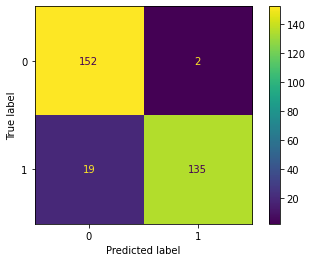

In [92]:
disp_knn = ConfusionMatrixDisplay(cm_knn)
disp_knn.plot()
plt.show()

##### Decision Tree

In [93]:
cm_dt = [[0,0],[0,0]]
for i in range(len(diagnosis)):
    cm_dt += confusion_matrix(diagnosis[i],guesseddiagnosisdt[i])

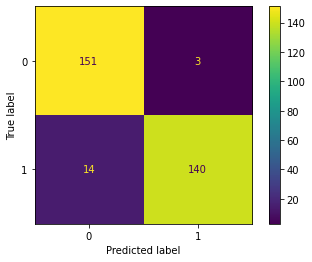

In [94]:
disp_dt = ConfusionMatrixDisplay(cm_dt)
disp_dt.plot()
plt.show()

##### Random Forest

In [95]:
cm_rf = [[0,0],[0,0]]
for i in range(len(diagnosis)):
    cm_rf += confusion_matrix(diagnosis[i],guesseddiagnosisrf[i])

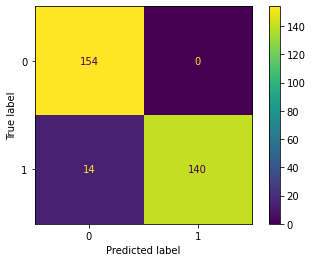

In [96]:
disp_rf = ConfusionMatrixDisplay(cm_rf)
disp_rf.plot()
plt.show()

##### 3.4.3. Learning Curve Result

In [97]:
#KNN
kn_train_sizes, kn_train_scores, kn_test_scores = learning_curve(KNeighborsClassifier(), x_train, y_train, cv = 10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

#DecisionTree
dt_train_sizes, dt_train_scores, dt_test_scores = learning_curve(DecisionTreeClassifier(), x_train, y_train, cv = 10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

#RandomForest
rf_train_sizes, rf_train_scores, rf_test_scores = learning_curve(RandomForestClassifier(), x_train, y_train, cv = 10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)


[learning_curve] Training set sizes: [  2   7  12  17  22  27  32  37  42  47  53  58  63  68  73  78  83  88
  93  98 103 108 113 118 123 128 133 138 143 148 154 159 164 169 174 179
 184 189 194 199 204 209 214 219 224 229 234 239 244 250]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[learning_curve] Training set sizes: [  2   7  12  17  22  27  32  37  42  47  53  58  63  68  73  78  83  88
  93  98 103 108 113 118 123 128 133 138 143 148 154 159 164 169 174 179
 184 189 194 199 204 209 214 219 224 229 234 239 244 250]


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[learning_curve] Training set sizes: [  2   7  12  17  22  27  32  37  42  47  53  58  63  68  73  78  83  88
  93  98 103 108 113 118 123 128 133 138 143 148 154 159 164 169 174 179
 184 189 194 199 204 209 214 219 224 229 234 239 244 250]


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.8s finished


In [98]:
#KNN
kn_train_mean = np.mean(kn_train_scores, axis=1)
kn_train_mean

kn_train_std = np.std(kn_train_scores, axis=1)
kn_train_std

kn_test_mean = np.mean(kn_test_scores, axis=1)
kn_test_mean

kn_test_std = np.std(kn_test_scores, axis=1)
kn_test_std

#DecisionTree
dt_train_mean = np.mean(dt_train_scores, axis=1)
dt_train_mean

dt_train_std = np.std(dt_train_scores, axis=1)
dt_train_std

dt_test_mean = np.mean(dt_test_scores, axis=1)
dt_test_mean

dt_test_std = np.std(dt_test_scores, axis=1)
dt_test_std

#RandomForest
rf_train_mean = np.mean(rf_train_scores, axis=1)
rf_train_mean

rf_train_std = np.std(rf_train_scores, axis=1)
rf_train_std

rf_test_mean = np.mean(rf_test_scores, axis=1)
rf_test_mean

rf_test_std = np.std(rf_test_scores, axis=1)
rf_test_std


array([0.01995777, 0.01995777, 0.01995777, 0.09048132, 0.12755082,
       0.14476968, 0.1411755 , 0.13001919, 0.12578774, 0.12611898,
       0.09514656, 0.08808332, 0.12703895, 0.13013238, 0.15971372,
       0.17568687, 0.17720445, 0.18520167, 0.18050084, 0.17960747,
       0.18415416, 0.18341773, 0.18202159, 0.1763608 , 0.19025671,
       0.18550751, 0.19361573, 0.17218691, 0.11739446, 0.09883962,
       0.07306199, 0.06612447, 0.05227529, 0.04992593, 0.04798143,
       0.04798143, 0.04992593, 0.04524506, 0.04279279, 0.04524506,
       0.03634583, 0.04524506, 0.03970039, 0.03925163, 0.04279279,
       0.04281487, 0.03972418, 0.04531635, 0.04164966, 0.04804866])

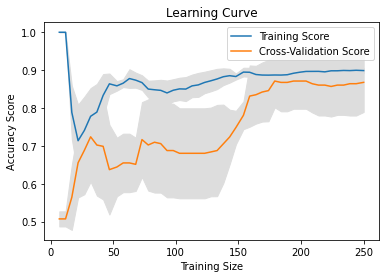

In [99]:
#KNN
plt.plot(kn_train_sizes, kn_train_mean, label='Training Score')
plt.plot(kn_train_sizes, kn_test_mean, label='Cross-Validation Score')

plt.fill_between(kn_train_sizes, kn_train_mean-kn_train_std, kn_train_mean+kn_train_std, color='#DDDDDD')
plt.fill_between(kn_train_sizes, kn_test_mean-kn_test_std, kn_test_mean+kn_test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')


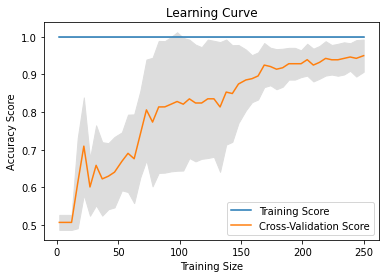

In [100]:
#DecisionTree
plt.plot(dt_train_sizes, dt_train_mean, label='Training Score')
plt.plot(dt_train_sizes, dt_test_mean, label='Cross-Validation Score')

plt.fill_between(dt_train_sizes, dt_train_mean-dt_train_std, dt_train_mean+dt_train_std, color='#DDDDDD')
plt.fill_between(dt_train_sizes, dt_test_mean-dt_test_std, dt_test_mean+dt_test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')


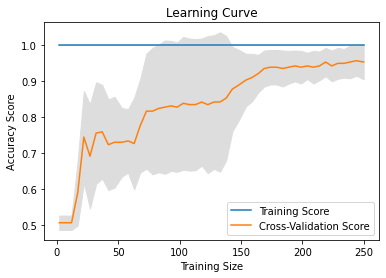

In [101]:
#RandomForest
plt.plot(rf_train_sizes, rf_train_mean, label='Training Score')
plt.plot(rf_train_sizes, rf_test_mean, label='Cross-Validation Score')

plt.fill_between(rf_train_sizes, rf_train_mean-rf_train_std, rf_train_mean+rf_train_std, color='#DDDDDD')
plt.fill_between(rf_train_sizes, rf_test_mean-rf_test_std, rf_test_mean+rf_test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

#### Shuffle Array

In [108]:
limit = int(((n_splits-1)/n_splits)*listPerson.shape[0])

X_train, X_test = listPerson.iloc[:limit], listPerson.iloc[limit:]
y_train, y_test = listDiagnosis[:limit], listDiagnosis[limit:]

X_train= ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = ['velocityWeighted','pressureWeighted','CISP'])
X_test = ss.transform(X_test)
X_test = pd.DataFrame(X_test, columns = ['velocityWeighted','pressureWeighted','CISP'])

#### KNN

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits


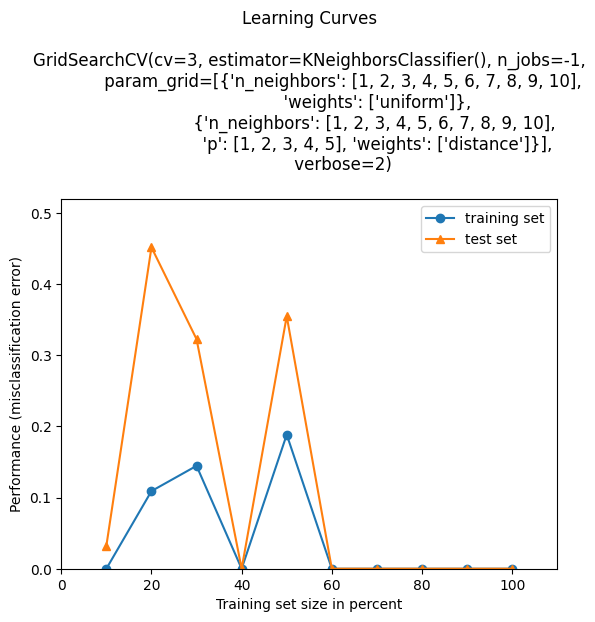

In [113]:
plot_learning_curves(X_train, y_train, X_test, y_test, knnc)
plt.show()

#### DecisionTree

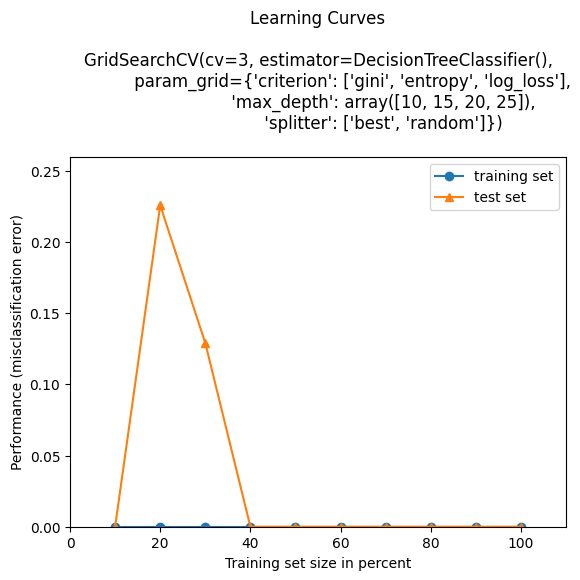

In [114]:
plot_learning_curves(X_train, y_train, X_test, y_test, cartc)
plt.show()

#### RandomForest

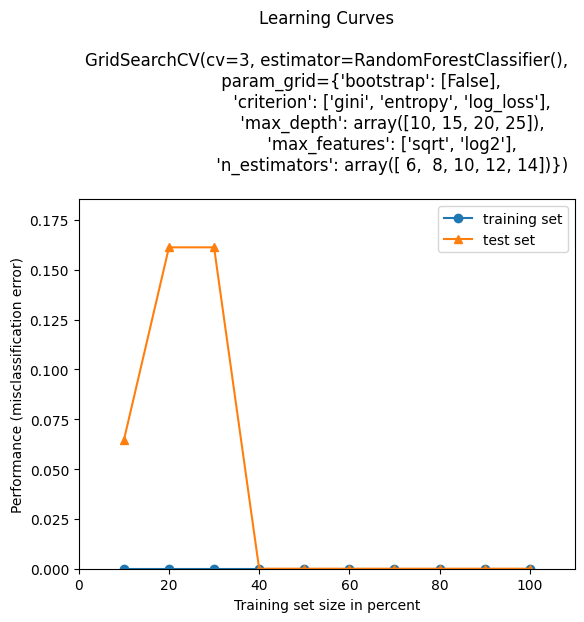

In [115]:
plot_learning_curves(X_train, y_train, X_test, y_test, rfc)
plt.show()